In [2]:
#!unzip /content/aviachipta-narxini-bashorat-qilish.zip

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier

from sklearn.pipeline import Pipeline
from sklearn import metrics

In [4]:
df = pd.read_csv("/content/train_data.csv")
df.head()

,id,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,1,Vistara,UK-810,Bangalore,Early_Morning,one,Night,Mumbai,Economy,14.25,21,7212
1,2,SpiceJet,SG-5094,Hyderabad,Evening,zero,Night,Kolkata,Economy,1.75,7,5292
2,3,Vistara,UK-846,Bangalore,Morning,one,Evening,Delhi,Business,9.58,5,60553
3,4,Vistara,UK-706,Kolkata,Morning,one,Evening,Hyderabad,Economy,6.75,28,5760
4,5,Indigo,6E-5394,Chennai,Early_Morning,zero,Morning,Mumbai,Economy,2.00,4,10712


In [5]:
test_df = pd.read_csv("/content/test_data.csv")
test_df.head()

,id,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left
0,1,Air_India,AI-765,Kolkata,Evening,one,Night,Delhi,Business,28.25,2
1,2,Vistara,UK-747,Delhi,Early_Morning,one,Night,Mumbai,Business,13.83,34
2,3,Air_India,AI-570,Mumbai,Early_Morning,zero,Early_Morning,Chennai,Business,2.00,30
3,4,AirAsia,I5-974,Hyderabad,Night,one,Late_Night,Delhi,Economy,5.17,26
4,5,Air_India,AI-770,Kolkata,Night,one,Afternoon,Mumbai,Economy,16.33,35


In [6]:
df.shape

(20000, 12)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   id                20000 non-null  int64  
 1   airline           20000 non-null  object 
 2   flight            20000 non-null  object 
 3   source_city       20000 non-null  object 
 4   departure_time    20000 non-null  object 
 5   stops             20000 non-null  object 
 6   arrival_time      20000 non-null  object 
 7   destination_city  20000 non-null  object 
 8   class             20000 non-null  object 
 9   duration          20000 non-null  float64
 10  days_left         20000 non-null  int64  
 11  price             20000 non-null  int64  
dtypes: float64(1), int64(3), object(8)
memory usage: 1.8+ MB


In [8]:
df.describe()

,id,duration,days_left,price
count,20000.000000,20000.000000,20000.000000,20000.000000
mean,10000.500000,12.177627,25.924150,20960.281700
std,5773.647028,7.157944,13.624874,22775.459535
min,1.000000,0.830000,1.000000,1105.000000
25%,5000.750000,6.830000,14.000000,4783.000000
50%,10000.500000,11.250000,26.000000,7425.000000
75%,15000.250000,16.080000,38.000000,42521.000000
max,20000.000000,38.580000,49.000000,114523.000000


In [9]:
#Clarifying data of 'airplane'

df['airline'].value_counts()

,count
airline,
Vistara,8535
Air_India,5371
Indigo,2924
GO_FIRST,1508
AirAsia,1056
SpiceJet,606


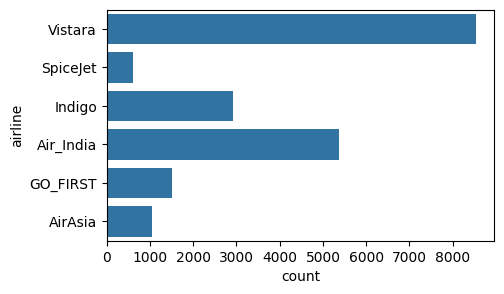

In [10]:
plt.figure(figsize=(5,3))
sns.countplot(df['airline'])
plt.show()

In [11]:
#changing values
df['airline'] = df['airline'].replace({'Vistara':0, 'Air_India':1, 'Indigo':2,'GO_FIRST':3,'AirAsia':4,'SpiceJet':5})

In [12]:
#changing values
test_df['airline'] = test_df['airline'].replace({'Vistara':0, 'Air_India':1, 'Indigo':2,'GO_FIRST':3,'AirAsia':4,'SpiceJet':5})

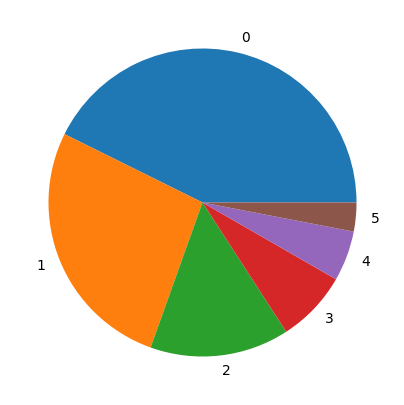

In [13]:
# Calculate the value counts for each airline and use it for the pie chart
plt.figure(figsize=(5,5))
plt.pie(df['airline'].value_counts(), labels=df['airline'].value_counts().index)
plt.show()

In [14]:
#Clarifying data of 'flight'

df['flight'].value_counts()

,count
flight,
UK-706,208
UK-720,190
UK-822,178
UK-772,169
UK-836,169
...,...
6E-2033,1
6E-869,1
6E-2841,1


In [15]:
df['source_city'].value_counts()

,count
source_city,
Mumbai,4068
Delhi,4022
Bangalore,3486
Kolkata,3092
Hyderabad,2748
Chennai,2584


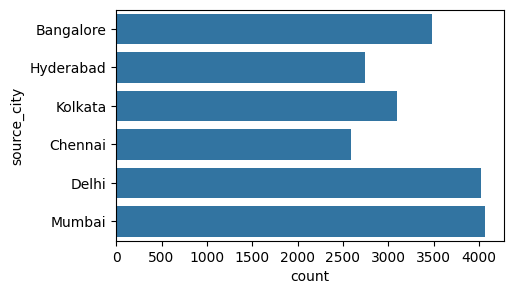

In [16]:
# Calculate the value counts for each source_city

plt.figure(figsize=(5,3))
sns.countplot(df['source_city'])
plt.show()

In [17]:
#changing values
df['source_city'] = df['source_city'].replace({'Mumbai':0, 'Delhi':1, 'Bangalore':2,'Kolkata':3,'Hyderabad':4,'Chennai':5})

In [18]:
#changing values
#test_df['source_city'] = test_df['source_city'].replace({'Mumbai':0, 'Delhi':1, 'Bangalore':2,'Kolkata':3,'Hyderabad':4,'Chennai':5})

In [19]:
df['departure_time'].value_counts()

,count
departure_time,
Morning,4738
Early_Morning,4432
Evening,4341
Night,3231
Afternoon,3166
Late_Night,92


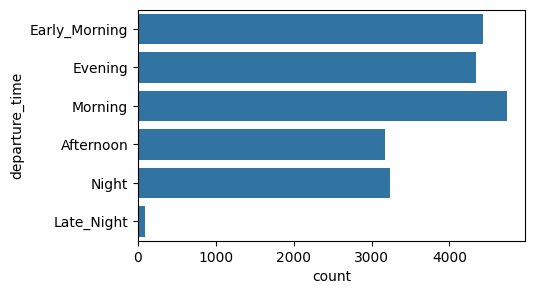

In [20]:
# Calculate the value counts for each departure_time

plt.figure(figsize=(5,3))
sns.countplot(df['departure_time'])
plt.show()

In [21]:
#changing values
df['departure_time'] = df['departure_time'].replace({'Morning':0, 'Early_Morning':1, 'Evening':2,'Night':3,'Afternoon':4,'Late_Night':5})

In [22]:
#changing values
#test_df['departure_time'] = test_df['departure_time'].replace({'Morning':0, 'Early_Morning':1, 'Evening':2,'Night':3,'Afternoon':4,'Late_Night':5})

In [23]:
df['stops'].value_counts()

,count
stops,
one,16666
zero,2440
two_or_more,894


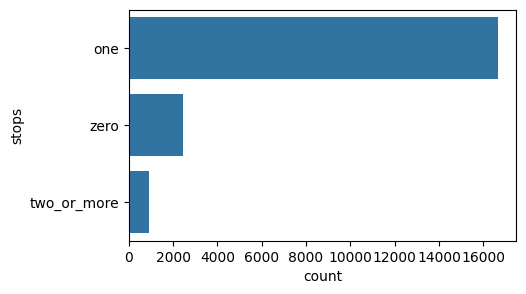

In [24]:
# Calculate the value counts for each stops

plt.figure(figsize=(5,3))
sns.countplot(df['stops'])
plt.show()

In [25]:
#changing values
df['stops'] = df['stops'].replace({'zero':0, 'one':1, 'two_or_more':2})

In [26]:
#changing values
#test_df['stops'] = test_df['stops'].replace({'zero':0, 'one':1, 'two_or_more':2})

In [27]:
df['arrival_time'].value_counts()

,count
arrival_time,
Night,6142
Evening,5316
Morning,4086
Afternoon,2536
Early_Morning,1004
Late_Night,916


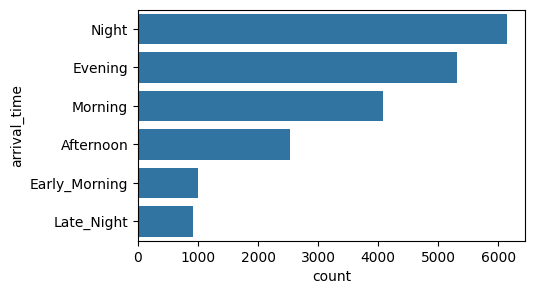

In [28]:
# Calculate the value counts for arrival_time
plt.figure(figsize=(5,3))
sns.countplot(df['arrival_time'])
plt.show()

In [29]:
#changing values
df['arrival_time'] = df['arrival_time'].replace({'Morning':0, 'Early_Morning':1, 'Evening':2,'Night':3,'Afternoon':4,'Late_Night':5})

In [30]:
#changing values
#test_df['arrival_time'] = test_df['arrival_time'].replace({'Morning':0, 'Early_Morning':1, 'Evening':2,'Night':3,'Afternoon':4,'Late_Night':5})

In [31]:
df['destination_city'].value_counts()

,count
destination_city,
Mumbai,3918
Delhi,3825
Bangalore,3425
Kolkata,3323
Hyderabad,2814
Chennai,2695


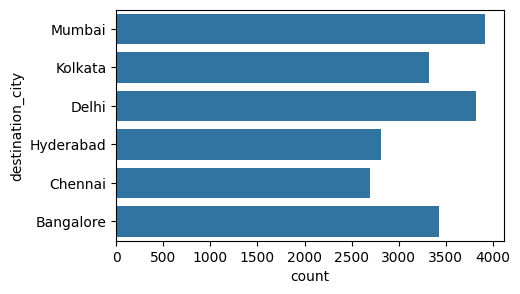

In [32]:
# Calculate the value counts for destination_city

plt.figure(figsize=(5,3))
sns.countplot(df['destination_city'])
plt.show()

In [33]:
#changing values
df['destination_city'] = df['destination_city'].replace({'Mumbai':0, 'Delhi':1, 'Bangalore':2,'Kolkata':3,'Hyderabad':4,'Chennai':5})

In [34]:
#changing values
#test_df['destination_city'] = test_df['destination_city'].replace({'Mumbai':0, 'Delhi':1, 'Bangalore':2,'Kolkata':3,'Hyderabad':4,'Chennai':5})

In [35]:
df['class'].value_counts()

,count
class,
Economy,13753
Business,6247


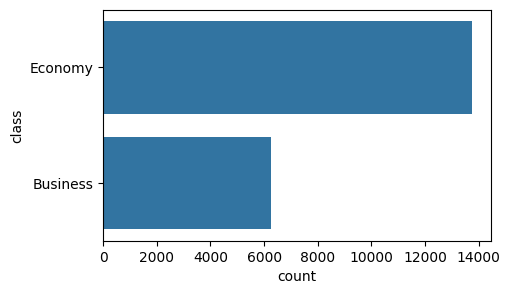

In [36]:
# Calculate the value counts for class

plt.figure(figsize=(5,3))
sns.countplot(df['class'])
plt.show()

In [37]:
#changing values
df['class'] = df['class'].replace({'Economy':0, 'Business':1})

In [38]:
#changing values
#test_df['class'] = test_df['class'].replace({'Economy':0, 'Business':1})

In [39]:
df.sample(10)

,id,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
19646,19647,0,UK-880,4,4,1,2,3,1,6.17,19,60074
4242,4243,0,UK-772,3,0,1,1,4,1,21.42,28,49207
15566,15567,1,AI-676,3,0,1,2,2,0,8.83,41,5135
7514,7515,0,UK-890,4,2,1,3,0,0,6.17,46,4436
8001,8002,3,G8-676,3,4,1,3,1,0,5.50,46,6294
19329,19330,0,UK-985,1,2,1,1,2,1,12.00,36,62617
1531,1532,1,AI-610,2,2,1,1,5,1,12.17,29,43865
16804,16805,1,AI-538,5,3,1,4,2,0,16.17,41,6308
18535,18536,2,6E-626,4,4,1,2,5,0,4.25,48,1543
4939,4940,1,AI-619,0,3,0,3,4,0,1.33,19,2111


In [40]:
df.drop('flight', axis=1, inplace=True)

In [41]:
df.sample(10)

,id,airline,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
7912,7913,0,5,3,1,4,4,0,15.50,39,4086
4106,4107,0,5,0,2,2,2,0,8.75,31,5924
19182,19183,0,2,0,1,4,4,0,26.75,7,8260
5468,5469,1,0,1,1,0,1,0,27.25,23,4239
9404,9405,1,0,3,1,3,2,1,22.58,32,54608
16242,16243,1,3,2,1,4,0,0,19.58,43,7321
5945,5946,3,3,2,1,5,1,0,8.08,43,7804
10099,10100,3,0,4,1,3,4,0,7.17,14,12873
2021,2022,0,0,4,1,3,2,1,8.00,20,54608
455,456,4,1,4,1,3,4,0,9.08,44,2050


In [42]:
df.corrwith(df['price']).abs().sort_values(ascending=False)

,0
price,1.000000
class,0.937868
airline,0.427821
duration,0.213158
stops,0.121455
days_left,0.102545
arrival_time,0.075473
destination_city,0.026367
departure_time,0.021312
source_city,0.012656


In [43]:
corr_matrix = df.corr().abs()
corr_matrix.style.background_gradient(cmap='coolwarm')

,id,airline,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
id,1.000000,0.003204,0.005929,0.011983,0.006179,0.004081,0.008063,0.000039,0.000458,0.003195,0.002443
airline,0.003204,1.000000,0.036549,0.057640,0.115100,0.118860,0.062843,0.398889,0.247263,0.028653,0.427821
source_city,0.005929,0.036549,1.000000,0.024973,0.044588,0.037149,0.194286,0.023967,0.050814,0.005813,0.012656
departure_time,0.011983,0.057640,0.024973,1.000000,0.047126,0.028133,0.022224,0.004238,0.028859,0.000231,0.021312
stops,0.006179,0.115100,0.044588,0.047126,1.000000,0.006463,0.111627,0.000567,0.470493,0.003238,0.121455
arrival_time,0.004081,0.118860,0.037149,0.028133,0.006463,1.000000,0.106535,0.078615,0.165463,0.005472,0.075473
destination_city,0.008063,0.062843,0.194286,0.022224,0.111627,0.106535,1.000000,0.012098,0.112502,0.002517,0.026367
class,0.000039,0.398889,0.023967,0.004238,0.000567,0.078615,0.012098,1.000000,0.144831,0.022332,0.937868
duration,0.000458,0.247263,0.050814,0.028859,0.470493,0.165463,0.112502,0.144831,1.000000,0.020091,0.213158
days_left,0.003195,0.028653,0.005813,0.000231,0.003238,0.005472,0.002517,0.022332,0.020091,1.000000,0.102545


In [44]:
data = df[['class','airline','duration','stops','days_left','price']]

In [45]:
data.head()

,class,airline,duration,stops,days_left,price
0,0,0,14.25,1,21,7212
1,0,5,1.75,0,7,5292
2,1,0,9.58,1,5,60553
3,0,0,6.75,1,28,5760
4,0,2,2.00,0,4,10712


In [52]:
#Seperating Dependent & Independent Variable

X = data.drop('price', axis=1)
y = data['price']

In [53]:
#Splitting Train & Test Dataset

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

Model Training

Linear Regression,
KNeignbors Regressor,
Decision Tree Regressor,
Random Forest Regressor...

In [55]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split # Assuming you are also using train_test_split

#Seperating Dependent & Independent Variable
# ... (your existing code)

#Splitting Train & Test Dataset
# ... (your existing code)

linear = LinearRegression()
linear_model = linear.fit(X_train, y_train)  # Use a different variable name

print(f'Training Score - {(linear_model.score(X_train, y_train) * 100).round(2)}%')
print(f'Testing Score  - {(linear_model.score(X_test, y_test) * 100).round(2)}%')

Training Score - 90.33%
Testing Score  - 90.22%


In [57]:
from sklearn.neighbors import KNeighborsRegressor # Import the necessary class

KNR = KNeighborsRegressor()
model = KNR.fit(X_train, y_train)

print(f'Training Score - {(model.score(X_train, y_train) * 100).round(2)}%')
print(f'Testing Score  - {(model.score(X_test, y_test) * 100).round(2)}%')

Training Score - 93.19%
Testing Score  - 87.85%


In [59]:
from sklearn.tree import DecisionTreeRegressor # Import DecisionTreeRegressor

DTR = DecisionTreeRegressor()
model = DTR.fit(X_train, y_train)

print(f'Training Score - {(model.score(X_train, y_train) * 100).round(2)}%')
print(f'Testing Score  - {(model.score(X_test, y_test) * 100).round(2)}%')

Training Score - 99.39%
Testing Score  - 90.03%


In [60]:
RFR = RandomForestRegressor()
model = RFR.fit(X_train, y_train)

print(f'Training Score - {(model.score(X_train, y_train) * 100).round(2)}%')
print(f'Testing Score  - {(model.score(X_test, y_test) * 100).round(2)}%')

Training Score - 98.71%
Testing Score  - 93.52%


In [61]:
n_estimators=[int(x) for x in np.linspace(start=100,stop=1200,num=3)]

max_features=['auto','sqrt']

max_depth=[int(x) for x in np.linspace(5,30,num=6)]

min_samples_split=[5,10,15,20,25,30]

random_grid={
    'n_estimators':n_estimators,
    'max_features':max_features,
    'max_depth':max_depth,
    'min_samples_split':min_samples_split
}

In [63]:
from sklearn.model_selection import RandomizedSearchCV # Import RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor # Import RandomForestRegressor

# Create a new instance of the RandomForestRegressor
rfr = RandomForestRegressor()

# Now use 'rfr' instead of 'model' in RandomizedSearchCV
model_search = RandomizedSearchCV(estimator=rfr, param_distributions=random_grid, cv=5, verbose=2, n_jobs=-1)

print('Model Training...\n')
model_search.fit(X_train, y_train) # Fit the RandomizedSearchCV object
print('Training Completed !!!')

Model Training...

Fitting 5 folds for each of 10 candidates, totalling 50 fits


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:425: FitFailedWarning: 
15 fits failed out of a total of 50.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
15 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 729, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 1145, in wrapper
    estimator._validate_params()
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 638, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/utils/_

Training Completed !!!


In [64]:
print(f'Training Score - {(model.score(X_train, y_train) * 100).round(2)}%')
print(f'Testing Score  - {(model.score(X_test, y_test) * 100).round(2)}%')

Training Score - 98.71%
Testing Score  - 93.52%


In [66]:
import pickle # Import the pickle module

pickle.dump(model, open('model.pkl', 'wb')) # Now you can use pickle.dump